In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Bidirectional

# Load the dataset
df = pd.read_csv('NIFTY50_all.csv')  # Adjust if file name or path differs
df_stock = df[df['Symbol'] == 'RELIANCE']  # Choose the stock of interest
data = df_stock['Close'].values
data = data.reshape(-1, 1)

# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [2]:
# Create the training and test datasets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 10
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features] for RNN and LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))



In [3]:
# RNN Model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(look_back, 1)))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.fit(X_train, y_train, epochs=20, batch_size=10, verbose=1)

Epoch 1/20
424/424 [==============================] - 9s 12ms/step - loss: 0.0015
Epoch 2/20
424/424 [==============================] - 4s 11ms/step - loss: 2.7670e-04
Epoch 3/20
424/424 [==============================] - 5s 13ms/step - loss: 2.7215e-04
Epoch 4/20
424/424 [==============================] - 4s 10ms/step - loss: 2.1241e-04
Epoch 5/20
424/424 [==============================] - 4s 10ms/step - loss: 2.0832e-04
Epoch 6/20
424/424 [==============================] - 4s 9ms/step - loss: 2.0365e-04
Epoch 7/20
424/424 [==============================] - 4s 10ms/step - loss: 1.6301e-04
Epoch 8/20
424/424 [==============================] - 5s 13ms/step - loss: 1.5880e-04
Epoch 9/20
424/424 [==============================] - 5s 12ms/step - loss: 1.4569e-04
Epoch 10/20
424/424 [==============================] - 5s 12ms/step - loss: 1.5844e-04
Epoch 11/20
424/424 [==============================] - 6s 13ms/step - loss: 1.4991e-04
Epoch 12/20
424/424 [==============================] - 5s

In [4]:
# Vanilla LSTM Model
vanilla_lstm_model = Sequential()
vanilla_lstm_model.add(LSTM(50, input_shape=(look_back, 1)))
vanilla_lstm_model.add(Dense(1))
vanilla_lstm_model.compile(optimizer='adam', loss='mean_squared_error')
vanilla_lstm_model.fit(X_train, y_train, epochs=20, batch_size=10, verbose=1)

Epoch 1/20
424/424 [==============================] - 8s 7ms/step - loss: 0.0024
Epoch 2/20
424/424 [==============================] - 3s 8ms/step - loss: 3.9413e-04
Epoch 3/20
424/424 [==============================] - 3s 7ms/step - loss: 3.8707e-04
Epoch 4/20
424/424 [==============================] - 3s 6ms/step - loss: 3.6129e-04
Epoch 5/20
424/424 [==============================] - 3s 6ms/step - loss: 3.1350e-04
Epoch 6/20
424/424 [==============================] - 3s 6ms/step - loss: 2.8526e-04
Epoch 7/20
424/424 [==============================] - 3s 6ms/step - loss: 2.5690e-04
Epoch 8/20
424/424 [==============================] - 3s 6ms/step - loss: 2.4352e-04
Epoch 9/20
424/424 [==============================] - 3s 6ms/step - loss: 2.2037e-04
Epoch 10/20
424/424 [==============================] - 3s 6ms/step - loss: 2.0199e-04
Epoch 11/20
424/424 [==============================] - 3s 6ms/step - loss: 1.9168e-04
Epoch 12/20
424/424 [==============================] - 3s 8ms/step 

In [5]:

# Stacked LSTM Model
stacked_lstm_model = Sequential()
stacked_lstm_model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
stacked_lstm_model.add(LSTM(50, return_sequences=False))
stacked_lstm_model.add(Dense(1))
stacked_lstm_model.compile(optimizer='adam', loss='mean_squared_error')
stacked_lstm_model.fit(X_train, y_train, epochs=20, batch_size=10, verbose=1)

Epoch 1/20
424/424 [==============================] - 8s 10ms/step - loss: 0.0015
Epoch 2/20
424/424 [==============================] - 4s 9ms/step - loss: 5.6578e-04
Epoch 3/20
424/424 [==============================] - 4s 9ms/step - loss: 4.8882e-04
Epoch 4/20
424/424 [==============================] - 4s 9ms/step - loss: 4.0706e-04
Epoch 5/20
424/424 [==============================] - 4s 9ms/step - loss: 3.4335e-04
Epoch 6/20
424/424 [==============================] - 4s 9ms/step - loss: 2.6016e-04
Epoch 7/20
424/424 [==============================] - 4s 9ms/step - loss: 2.1313e-04
Epoch 8/20
424/424 [==============================] - 4s 9ms/step - loss: 1.9459e-04
Epoch 9/20
424/424 [==============================] - 4s 9ms/step - loss: 1.8424e-04
Epoch 10/20
424/424 [==============================] - 4s 9ms/step - loss: 1.6853e-04
Epoch 11/20
424/424 [==============================] - 4s 9ms/step - loss: 1.7195e-04
Epoch 12/20
424/424 [==============================] - 4s 9ms/step

In [6]:
# Bidirectional LSTM Model
bidirectional_lstm_model = Sequential()
bidirectional_lstm_model.add(Bidirectional(LSTM(50, input_shape=(look_back, 1))))
bidirectional_lstm_model.add(Dense(1))
bidirectional_lstm_model.compile(optimizer='adam', loss='mean_squared_error')
bidirectional_lstm_model.fit(X_train, y_train, epochs=20, batch_size=10, verbose=1)



Epoch 1/20
424/424 [==============================] - 7s 9ms/step - loss: 0.0016
Epoch 2/20
424/424 [==============================] - 4s 9ms/step - loss: 4.2469e-04
Epoch 3/20
424/424 [==============================] - 4s 9ms/step - loss: 3.9602e-04
Epoch 4/20
424/424 [==============================] - 4s 9ms/step - loss: 3.4299e-04
Epoch 5/20
424/424 [==============================] - 4s 9ms/step - loss: 3.5344e-04
Epoch 6/20
424/424 [==============================] - 4s 9ms/step - loss: 2.8453e-04
Epoch 7/20
424/424 [==============================] - 4s 9ms/step - loss: 2.5794e-04
Epoch 8/20
424/424 [==============================] - 4s 9ms/step - loss: 2.3652e-04
Epoch 9/20
424/424 [==============================] - 4s 9ms/step - loss: 2.1206e-04
Epoch 10/20
424/424 [==============================] - 4s 9ms/step - loss: 2.0258e-04
Epoch 11/20
424/424 [==============================] - 4s 9ms/step - loss: 1.6759e-04
Epoch 12/20
424/424 [==============================] - 4s 9ms/step 

In [7]:
# Predictions
rnn_predictions = rnn_model.predict(X_test)
vanilla_lstm_predictions = vanilla_lstm_model.predict(X_test)
stacked_lstm_predictions = stacked_lstm_model.predict(X_test)
bidirectional_lstm_predictions = bidirectional_lstm_model.predict(X_test)


33/33 [==============================] - 1s 4ms/step


In [8]:

# Inverse transform predictions
rnn_predictions = scaler.inverse_transform(rnn_predictions)
vanilla_lstm_predictions = scaler.inverse_transform(vanilla_lstm_predictions)
stacked_lstm_predictions = scaler.inverse_transform(stacked_lstm_predictions)
bidirectional_lstm_predictions = scaler.inverse_transform(bidirectional_lstm_predictions)
y_test_inverse = scaler.inverse_transform([y_test])

RNN - MAE: 22.705182459692406, RMSE: 40.39776602145118, MAPE: 0.016867841096668012
Vanilla LSTM - MAE: 22.29034826857605, RMSE: 39.53203834872636, MAPE: 0.016468796973205205
Stacked LSTM - MAE: 21.552944426532022, RMSE: 39.42813368987508, MAPE: 0.01598972580115794
Bidirectional LSTM - MAE: 65.35626379824275, RMSE: 75.90085704624276, MAPE: 0.049233643475306

RNN Actual vs Predicted Prices:
    Actual  RNN Predicted
0  1044.80    1031.544189
1  1045.20    1056.209717
2  1049.65    1052.147827
3  1043.50    1055.610840
4  1033.65    1050.435181

Vanilla LSTM Actual vs Predicted Prices:
    Actual  Vanilla LSTM Predicted
0  1044.80             1018.462036
1  1045.20             1036.067261
2  1049.65             1039.184204
3  1043.50             1042.271606
4  1033.65             1037.401978

Stacked LSTM Actual vs Predicted Prices:
    Actual  Stacked LSTM Predicted
0  1044.80             1027.116943
1  1045.20             1043.416138
2  1049.65             1047.272827
3  1043.50        

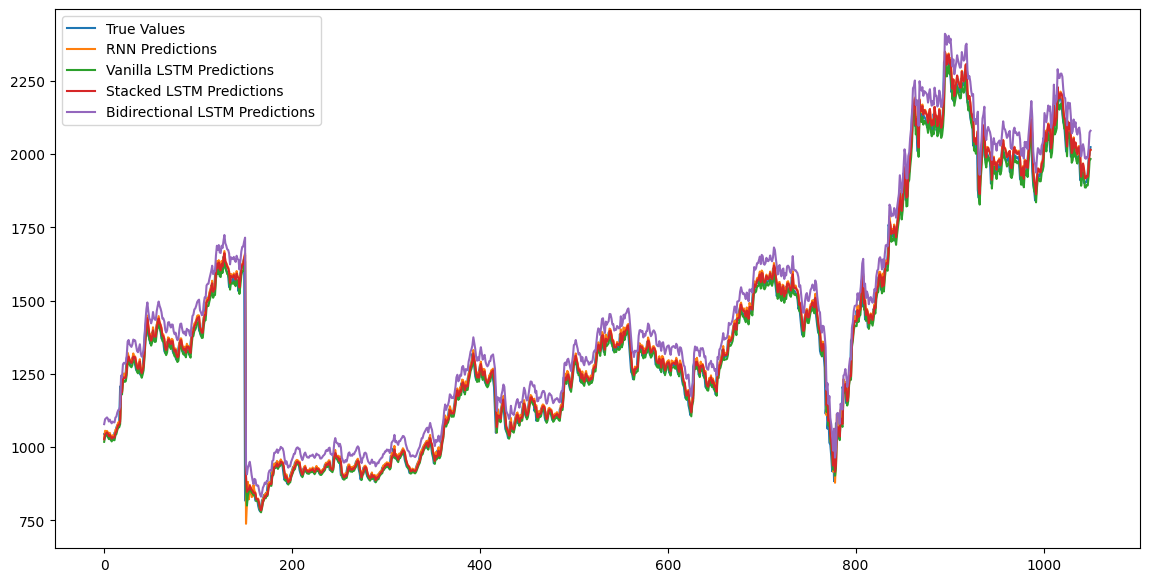

In [9]:
# Evaluate the models
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return mae, rmse, mape

rnn_mae, rnn_rmse, rnn_mape = evaluate_model(y_test_inverse[0], rnn_predictions[:, 0])
vanilla_lstm_mae, vanilla_lstm_rmse, vanilla_lstm_mape = evaluate_model(y_test_inverse[0], vanilla_lstm_predictions[:, 0])
stacked_lstm_mae, stacked_lstm_rmse, stacked_lstm_mape = evaluate_model(y_test_inverse[0], stacked_lstm_predictions[:, 0])
bidirectional_lstm_mae, bidirectional_lstm_rmse, bidirectional_lstm_mape = evaluate_model(y_test_inverse[0], bidirectional_lstm_predictions[:, 0])

# Print the metrics
print(f"RNN - MAE: {rnn_mae}, RMSE: {rnn_rmse}, MAPE: {rnn_mape}")
print(f"Vanilla LSTM - MAE: {vanilla_lstm_mae}, RMSE: {vanilla_lstm_rmse}, MAPE: {vanilla_lstm_mape}")
print(f"Stacked LSTM - MAE: {stacked_lstm_mae}, RMSE: {stacked_lstm_rmse}, MAPE: {stacked_lstm_mape}")
print(f"Bidirectional LSTM - MAE: {bidirectional_lstm_mae}, RMSE: {bidirectional_lstm_rmse}, MAPE: {bidirectional_lstm_mape}")

# Print actual vs predicted prices
def print_actual_vs_predicted(predictions, model_name):
    df_actual_vs_predicted = pd.DataFrame({
        'Actual': y_test_inverse[0],
        f'{model_name} Predicted': predictions[:, 0]
    })
    print(f"\n{model_name} Actual vs Predicted Prices:")
    print(df_actual_vs_predicted.head())

print_actual_vs_predicted(rnn_predictions, 'RNN')
print_actual_vs_predicted(vanilla_lstm_predictions, 'Vanilla LSTM')
print_actual_vs_predicted(stacked_lstm_predictions, 'Stacked LSTM')
print_actual_vs_predicted(bidirectional_lstm_predictions, 'Bidirectional LSTM')

# Plot the results
plt.figure(figsize=(14,7))
plt.plot(y_test_inverse[0], label='True Values')
plt.plot(rnn_predictions[:,0], label='RNN Predictions')
plt.plot(vanilla_lstm_predictions[:,0], label='Vanilla LSTM Predictions')
plt.plot(stacked_lstm_predictions[:,0], label='Stacked LSTM Predictions')
plt.plot(bidirectional_lstm_predictions[:,0], label='Bidirectional LSTM Predictions')
plt.legend()
plt.show()
